# Experiment on uniform toy data from square

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import umapns
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
from umapns.my_utils import compute_low_dim_psims
import os
import pickle

In [2]:
fig_path = "../figures"
data_path = "../data/toy_uniform"

In [3]:
seed = 0
n = 1000
l = 1
alpha=0.5


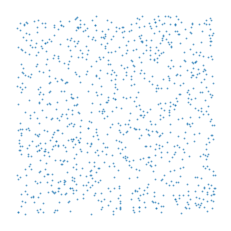

In [4]:
try:
    data = np.load(os.path.join(data_path, f"uniform_{n}_{l}_original_seed_{seed}.npy"))
except FileNotFoundError:
    np.random.seed(seed)
    data = np.random.uniform(0, l, size=(n, 2))
    np.save(os.path.join(data_path,
                         f"uniform_{n}_{l}_original_seed_{seed}.npy"),
            data)

fig_data = plt.figure()
plt.scatter(*data.T, s=1, alpha = 0.5)
plt.gca().set_aspect("equal")
plt.axis('off')
fig_data.savefig(os.path.join(fig_path, f"toy_uniform_{n}_{l}_original_seed_{seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)

In [5]:
# get dense input graph
min_dist = 0.1
spread = 1.0
a, b= umapns.umap_.find_ab_params(spread=spread, min_dist=min_dist)
low_sim = compute_low_dim_psims(data, a, b)
low_sim_sparse = coo_matrix(low_sim)


In [6]:
# Initialize UMAP at the input data
try:
    with open(os.path.join(data_path, f"uniform_{n}_{l}_umapperns_init_seed_{seed}.pkl"), "rb") as file:
        umapperns_init = pickle.load(file)
        embd_init = umapperns_init.embedding_
except FileNotFoundError:
    umapperns_init = umapns.UMAP(init=data,
                                 random_state=seed)
    embd_init = umapperns_init.fit_transform(data)
    with open(os.path.join(data_path, f"uniform_{n}_{l}_umapperns_init_seed_{seed}.pkl"), "wb") as file:
        pickle.dump(umapperns_init, file, pickle.HIGHEST_PROTOCOL)

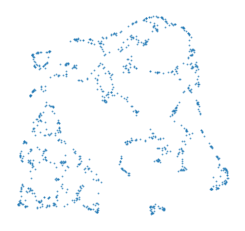

In [7]:
plt.scatter(*embd_init.T, s=1, alpha = 0.5)
plt.gca().set_aspect("equal")
plt.axis('off')
plt.savefig(os.path.join(fig_path, f"toy_uniform_{n}_{l}_init_seed_{seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)


In [8]:
# Initialize at the input data and optimize for 10000 epochs
try:
    with open(os.path.join(data_path, f"uniform_{n}_{l}_umapperns_init_10000_seed_{seed}.pkl"), "rb") as file:
        umapperns_init_10000 = pickle.load(file)
        embd_init_10000 = umapperns_init_10000.embedding_
except FileNotFoundError:
    umapperns_init_10000 = umapns.UMAP(init=data,
                                       n_epochs=10000,
                                       random_state=seed,
                                       verbose=True)
    embd_init_10000 = umapperns_init_10000.fit_transform(data)
    with open(os.path.join(data_path, f"uniform_{n}_{l}_umapperns_init_10000_seed_{seed}.pkl"), "wb") as file:
        pickle.dump(umapperns_init_10000, file, pickle.HIGHEST_PROTOCOL)

UMAP(dens_frac=0.0, dens_lambda=0.0,
     init=array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411],
       ...,
       [0.41443887, 0.79128155],
       [0.72119811, 0.48010781],
       [0.64386404, 0.50177313]]),
     n_epochs=10000, random_state=0, verbose=True)
Construct fuzzy simplicial set
Wed Apr 21 10:22:22 2021 Finding Nearest Neighbors
Wed Apr 21 10:22:22 2021 Finished Nearest Neighbor Search
Wed Apr 21 10:22:22 2021 Construct embedding
	completed  0  /  10000 epochs
	completed  1000  /  10000 epochs
	completed  2000  /  10000 epochs
	completed  3000  /  10000 epochs
	completed  4000  /  10000 epochs
	completed  5000  /  10000 epochs
	completed  6000  /  10000 epochs
	completed  7000  /  10000 epochs
	completed  8000  /  10000 epochs
	completed  9000  /  10000 epochs
Wed Apr 21 10:23:09 2021 Finished embedding


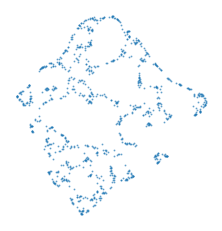

In [9]:
plt.scatter(*embd_init_10000.T, s=1, alpha = 0.5)
plt.gca().set_aspect("equal")
plt.axis('off')
plt.savefig(os.path.join(fig_path, f"toy_uniform_{n}_{l}_init_10000_seed_{seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)


In [10]:
# Initialize at the input data and use dense input similarities
try:
    with open(os.path.join(data_path, f"uniform_{n}_{l}_umapperns_init_graph_seed_{seed}.pkl"), "rb") as file:
        umapperns_init_graph = pickle.load(file)
        embd_init_graph = umapperns_init_graph.embedding_
except FileNotFoundError:
    umapperns_init_graph = umapns.UMAP(init=data,
                                       graph=low_sim_sparse,
                                       random_state=seed,
                                       verbose=True
                                       )
    embd_init_graph = umapperns_init_graph.fit_transform(data)
    with open(os.path.join(data_path, f"uniform_{n}_{l}_umapperns_init_graph_seed_{seed}.pkl"), "wb") as file:
        pickle.dump(umapperns_init_graph, file, pickle.HIGHEST_PROTOCOL)


UMAP(dens_frac=0.0, dens_lambda=0.0,
     graph_=<1000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in COOrdinate format>,
     init=array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411],
       ...,
       [0.41443887, 0.79128155],
       [0.72119811, 0.48010781],
       [0.64386404, 0.50177313]]),
     random_state=0, verbose=True)
Construct fuzzy simplicial set
Wed Apr 21 10:23:12 2021 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Wed Apr 21 10:28:09 2021 Finished embedding


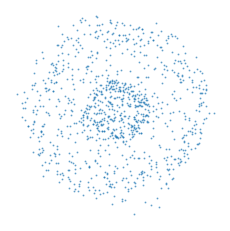

In [11]:
plt.scatter(*embd_init_graph.T, s=1, alpha = 0.5)
plt.gca().set_aspect("equal")
plt.axis('off')
plt.savefig(os.path.join(fig_path, f"toy_uniform_{n}_{l}_graph_seed_{seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)

In [12]:
# Initialize at the input data, use dense inpute similarities and optimize for 10000 epochs
try:
    with open(os.path.join(data_path, f"uniform_{n}_{l}_umapperns_init_graph_10000_seed_{seed}.pkl"), "rb") as file:
        umapperns_init_graph_10000 = pickle.load(file)
        embd_init_graph_10000 = umapperns_init_graph_10000.embedding_
except FileNotFoundError:
    umapperns_init_graph_10000 = umapns.UMAP(init=data,
                                       graph=low_sim_sparse,
                                       n_epochs=10000,
                                       push_tail=False,
                                       random_state=seed,
                                       verbose=True
                                       )
    embd_init_graph_10000 = umapperns_init_graph_10000.fit_transform(data)
    with open(os.path.join(data_path, f"uniform_{n}_{l}_umapperns_init_graph_10000_seed_{seed}.pkl"), "wb") as file:
        pickle.dump(umapperns_init_graph_10000, file, pickle.HIGHEST_PROTOCOL)

UMAP(dens_frac=0.0, dens_lambda=0.0,
     graph_=<1000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in COOrdinate format>,
     init=array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411],
       ...,
       [0.41443887, 0.79128155],
       [0.72119811, 0.48010781],
       [0.64386404, 0.50177313]]),
     n_epochs=10000, random_state=0, verbose=True)
Construct fuzzy simplicial set
Wed Apr 21 10:28:32 2021 Construct embedding
	completed  0  /  10000 epochs
	completed  1000  /  10000 epochs
	completed  2000  /  10000 epochs
	completed  3000  /  10000 epochs
	completed  4000  /  10000 epochs
	completed  5000  /  10000 epochs
	completed  6000  /  10000 epochs
	completed  7000  /  10000 epochs
	completed  8000  /  10000 epochs
	completed  9000  /  10000 epochs
Wed Apr 21 12:07:32 2021 Finished embedding


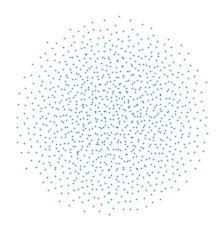

In [13]:
plt.scatter(*embd_init_graph_10000.T, s=1, alpha = 0.5)
plt.gca().set_aspect("equal")
plt.axis('off')
plt.savefig(os.path.join(fig_path, f"toy_uniform_{n}_{l}_init_graph_10000_seed_{seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)

## Push tail of negative sample

In [14]:
# Initialize UMAP at the input data, optimize for 10000 epochs and push tail of neg sample
try:
    with open(os.path.join(data_path, f"uniform_{n}_{l}_umapperns_init_10000_push_tail_seed_{seed}.pkl"), "rb") as file:
        umapperns_init_10000_push_tail = pickle.load(file)
        embd_init_10000_push_tail = umapperns_init_10000_push_tail.embedding_
except FileNotFoundError:
    umapperns_init_10000_push_tail = umapns.UMAP(init=data,
                                                 n_epochs=10000,
                                                 push_tail=True,
                                                 random_state=seed,
                                                 verbose=True
                                                 )
    embd_init_10000_push_tail = umapperns_init_10000_push_tail.fit_transform(data)
    with open(os.path.join(data_path, f"uniform_{n}_{l}_umapperns_init_10000_push_tail_seed_{seed}.pkl"), "wb") as file:
        pickle.dump(umapperns_init_10000_push_tail, file, pickle.HIGHEST_PROTOCOL)

UMAP(dens_frac=0.0, dens_lambda=0.0,
     init=array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411],
       ...,
       [0.41443887, 0.79128155],
       [0.72119811, 0.48010781],
       [0.64386404, 0.50177313]]),
     n_epochs=10000, push_tail=True, random_state=0, verbose=True)
Construct fuzzy simplicial set
Wed Apr 21 12:07:34 2021 Finding Nearest Neighbors
Wed Apr 21 12:07:34 2021 Finished Nearest Neighbor Search
Wed Apr 21 12:07:34 2021 Construct embedding
	completed  0  /  10000 epochs
	completed  1000  /  10000 epochs
	completed  2000  /  10000 epochs
	completed  3000  /  10000 epochs
	completed  4000  /  10000 epochs
	completed  5000  /  10000 epochs
	completed  6000  /  10000 epochs
	completed  7000  /  10000 epochs
	completed  8000  /  10000 epochs
	completed  9000  /  10000 epochs
Wed Apr 21 12:08:28 2021 Finished embedding


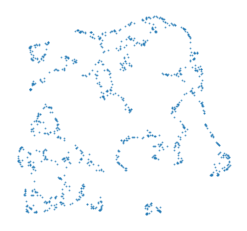

In [15]:
plt.scatter(*embd_init_10000_push_tail.T, s=1, alpha = 0.5)
plt.gca().set_aspect("equal")
plt.axis('off')
plt.savefig(os.path.join(fig_path, f"toy_uniform_{n}_{l}_init_10000_push_tail_seed_{seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)

In [16]:
# Initialize UMAP at the input data, use dense input similarities, optimize for 10000 epochs and push tail of neg sample
try:
    with open(os.path.join(data_path, f"uniform_{n}_{l}_umapperns_init_graph_10000_push_tail_seed_{seed}.pkl"), "rb") as file:
        umapperns_init_graph_10000_push_tail = pickle.load(file)
        embd_init_graph_10000_push_tail = umapperns_init_graph_10000_push_tail.embedding_
except FileNotFoundError:
    umapperns_init_graph_10000_push_tail = umapns.UMAP(init=data,
                                                       graph=low_sim_sparse,
                                                       n_epochs=10000,
                                                       push_tail=True,
                                                       random_state=seed,
                                                       verbose=True
                                                       )
    embd_init_graph_10000_push_tail = umapperns_init_graph_10000_push_tail.fit_transform(data)
    with open(os.path.join(data_path, f"uniform_{n}_{l}_umapperns_init_graph_10000_push_tail_seed_{seed}.pkl"), "wb") as file:
        pickle.dump(umapperns_init_graph_10000_push_tail, file, pickle.HIGHEST_PROTOCOL)

UMAP(dens_frac=0.0, dens_lambda=0.0,
     graph_=<1000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in COOrdinate format>,
     init=array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411],
       ...,
       [0.41443887, 0.79128155],
       [0.72119811, 0.48010781],
       [0.64386404, 0.50177313]]),
     n_epochs=10000, push_tail=True, random_state=0, verbose=True)
Construct fuzzy simplicial set
Wed Apr 21 12:08:29 2021 Construct embedding
	completed  0  /  10000 epochs
	completed  1000  /  10000 epochs
	completed  2000  /  10000 epochs
	completed  3000  /  10000 epochs
	completed  4000  /  10000 epochs
	completed  5000  /  10000 epochs
	completed  6000  /  10000 epochs
	completed  7000  /  10000 epochs
	completed  8000  /  10000 epochs
	completed  9000  /  10000 epochs
Wed Apr 21 14:01:24 2021 Finished embedding


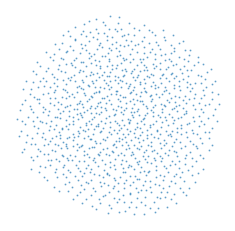

In [17]:
plt.scatter(*embd_init_graph_10000_push_tail.T, s=1, alpha = 0.5)
plt.gca().set_aspect("equal")
plt.axis('off')
plt.savefig(os.path.join(fig_path, f"toy_uniform_{n}_{l}_init_graph_10000_push_tail_seed_{seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)
